# Data visualization with various cuts explored in our paper.
## Transverse-momentum-dependent Multiplicities of Charged Hadrons for HERMES Airapetian:2012ki and COMPASS Collaborations Adolph:2013stb. 
## New COMPASS data are 
### Penn State Berks, Fall 2018 
#### * Alexey  Prokudin*

In [1]:
from __future__ import division, print_function
from functools import partial, reduce
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore
import fitpack
import interface
import obslib.sidis.reader
from qcdlib.auxiliary import AUX
from tools.config import conf
#%matplotlib inline
# make plots interacts
%matplotlib notebook 

This function reads data from multiple files and merges the data frames.

In [2]:
def get_data():
    # Merge all of the data tables
    return reduce(partial(pd.DataFrame.merge, how="outer"), map(pd.DataFrame, conf["sidis tabs"].values()))

upol_hermes_no_filters.py defines data files to read, no filters applied yet to the data selection. Here we read all HERMES multiplicities.

In [3]:
input_file = "../inputs/upol_hermes_no_filters.py"

CUTMIN = 0.99
CUTMAX = 5.28

filterstr = "dy>"
#filterstr = "yh_minus_yp>"

The interface.py allows to get configuration file from the file that we read.

In [4]:
interface.gen_config(input_file)  # Read file

conf["datasets"]["sidis"]["filters"][0] = filterstr + str(CUTMIN)  # Apply filter with min cut

conf["aux"] = AUX()
conf["sidis tabs"] = obslib.sidis.reader.READER().load_data_sets("sidis")
#conf['sidis stfuncs'] = obslib.sidis.stfuncs.STFUNCS()

data = get_data().sort_values("dy")

loading sidis data sets 1007

In [5]:
print(", ".join(sorted(data.columns)))

Ebeam, F2, Q2, R, R0, R1, R2, W2, col, dy, hadron, i, lnR, obs, pT, qT, stat_u, systabs_u, systole, systrel, target, value, x, xn, y, yf, yh, yi, yp, z, zn


In [6]:
data["R1"]

2452    1.070381
2117    1.211817
789     1.208759
2173    1.439916
2508    1.477480
1179    1.374034
1123    1.239698
454     2.378479
2229    2.141644
118     2.402657
174     2.863632
1838    2.874682
1503    2.880010
901     2.281452
1447    2.437833
510     2.890433
844     0.885008
1782    2.447973
845     1.641994
2507    1.034175
1559    4.067843
1122    0.934432
2451    0.883663
788     0.856382
2172    1.036356
566     4.172106
2116    1.015519
1178    1.373126
1894    4.195322
1067    1.436941
          ...   
1427    0.077234
1825    0.070711
371     0.080892
35      0.082093
1364    0.082342
1699    0.082745
1602    0.023711
609     0.024137
1937    0.023651
664     0.011673
273     0.023845
1657    0.012771
1992    0.011858
386     0.010825
1714    0.012367
50      0.015182
1379    0.015391
329     0.014635
105     0.084786
441     0.086845
1434    0.086605
1769    0.086898
378     0.094664
42      0.095990
1371    0.095240
1706    0.096023
385     0.098801
49      0.1062

In [6]:
data["yh_minus_yp"] = data["yh"] - data["yp"] 
data["yi_minus_yp_over_yp"] = np.sqrt( ((data["yi"] - data["yp"])/data["yp"])**2 ) 
data["yf_minus_yh_over_yh"] = np.sqrt( ((data["yf"] - data["yh"])/data["yh"])**2 )
data["yi_minus_yp"] = np.sqrt( ((data["yi"] - data["yp"]))**2 ) 
data["yf_minus_yh"] = np.sqrt( ((data["yf"] - data["yh"]))**2 )
# Ted's suggestion R2:
#data["R2"] = 1. - data["z"] *(1.-(data["pT"] / data["z"])**2) 

In [7]:
print(", ".join(sorted(data.columns)))

Ebeam, F2, Q2, R, R0, R1, R2, W2, col, dy, hadron, i, lnR, obs, pT, qT, stat_u, systabs_u, systole, systrel, target, value, x, xn, y, yf, yf_minus_yh, yf_minus_yh_over_yh, yh, yh_minus_yp, yi, yi_minus_yp, yi_minus_yp_over_yp, yp, z, zn


We create QCUT which is qT^2/Q^2

In [7]:
data["QCUT"] = (data["qT"])**2/ (data["Q2"])

In [8]:

def custom_label(label):
    if label =="Q2":
        label="$Q^2$"
    if label =="qT":
        label="$q_T$"
    if label =="qT":
        label="$q_T$"
    if label =="W2":
        label="$W^2\; (GeV^2)$"
    if label =="qToverQ":
        label="$q_T/Q$"
    if label =="qToverQ2":
        label="$q_T^2/Q^2$"
    if label =="dy":
        label="$y_p-y_h$"
    if label =="yh_minus_yp":
        label="$y_h-y_p$"
    if label =="yi":
        label="$y_i$"
    if label =="yf":
        label="$y_f$"
    if label =="yh":
        label="$y_h$"
    if label =="yp":
        label="$y_p$"
    if label =="yi_minus_yp":
        label="$|y_i - y_p|$"
    if label =="yf_minus_yh":
        label="$|y_f - y_h|$"
    if label =="yi_minus_yp_over_yp":
        label="$|(y_i - y_p)/yp|$"
    if label =="yf_minus_yh_over_yh":
        label="$|(y_f - y_h)/yh|$"
    if label =="R":
        label="$|R|$"    
    if label =="lnR":
        label="$ln(|R|)$"    
    if label =="R2":
        label="$R_2$"    
    if label =="R1":
        label="$R_1$"    
    if label =="R0":
        label="$R_0$"    

    return label

def color_plot(data,vert_lab, hor_lab, cmap="plasma", alpha=1.0):
    vert = data[vert_lab].values
    hor = data[hor_lab].values

    data_q = data["QCUT"]

    #colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    color_percentiles = partial(percentileofscore, data_q)
    colors = data_q.apply(color_percentiles)
    
    fig, ax = plt.subplots()

    #ax.set_title(custom_label(vert_lab) + " vs. " + custom_label(hor_lab))
    ax.set_ylabel(custom_label(vert_lab))
    ax.set_xlabel(custom_label(hor_lab))

    ax.scatter(hor, vert, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)
    
    #heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    #plt.colorbar(heatmap)

    fig.tight_layout()
    
    return fig, ax, vert, hor


def color_plot3D(data,x_lab, y_lab, z_lab, cmap="plasma", alpha=1.0):
    xval = data[x_lab].values
    yval = data[y_lab].values
    zval = data[z_lab].values


    data_q = data["QCUT"]

    #colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    color_percentiles = partial(percentileofscore, data_q)
    colors = data_q.apply(color_percentiles)
    
    fig = plt.figure()
    ax = Axes3D(fig)#fig.add_subplot(111, projection = "3d")

    
    ax.scatter(xval, yval, zval, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)


    ax.set_zlabel(custom_label(z_lab))
    ax.set_ylabel(custom_label(y_lab))
    ax.set_xlabel(custom_label(x_lab))

    
    #heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    #plt.colorbar(heatmap)

    #fig.tight_layout()
    
    return fig, ax, xval, yval, zval



In [10]:
#data["qT"] = data["pT"] / data["z"]
data["qToverQ"] = data["qT"] /(data["Q2"]**0.5)
data["qToverQ2"] = (data["qT"])**2/(data["Q2"])

qT vs. qToverQ2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. Q2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 54

qT vs. dy
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qToverQ2 vs. Q2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 54

qToverQ2 vs. dy
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qToverQ2 vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

Q2 vs. dy
Number of points: 2660
Unique vertical values: 54
Unique horizontal values: 2660

Q2 vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 54
Unique horizontal values: 2660

dy vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660



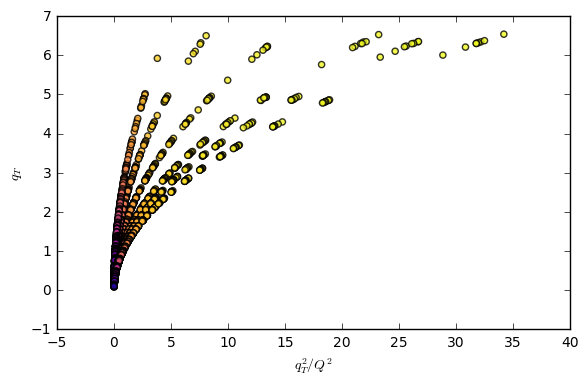

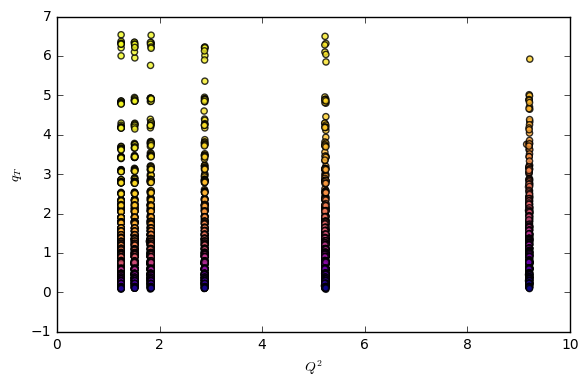

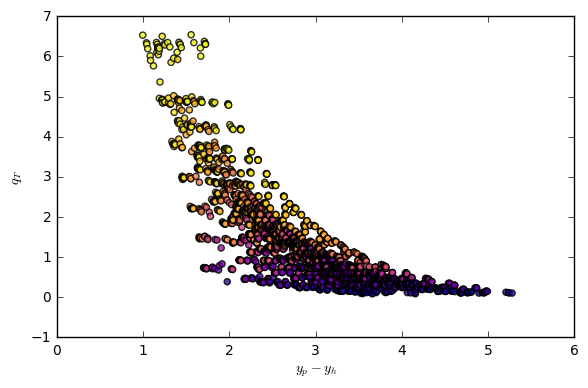

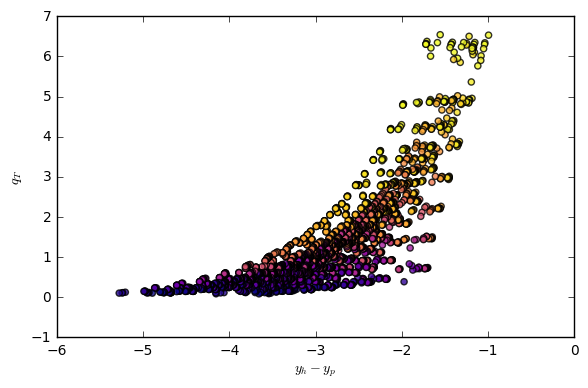

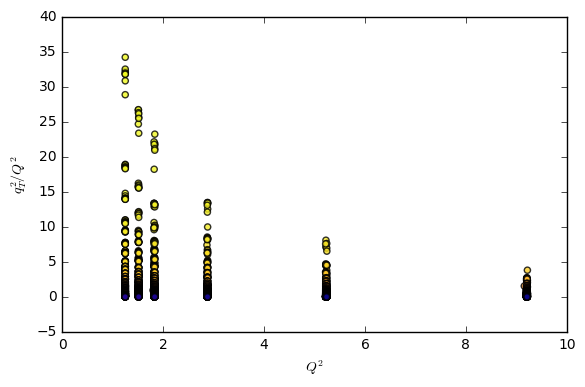

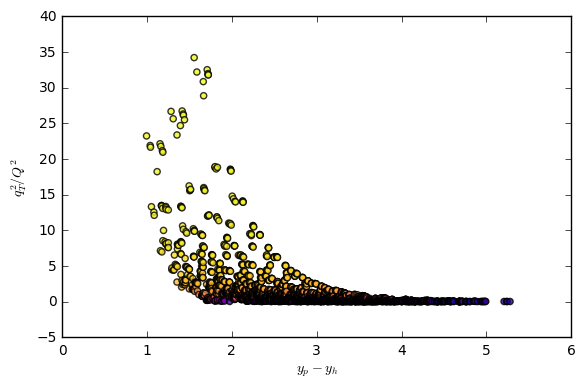

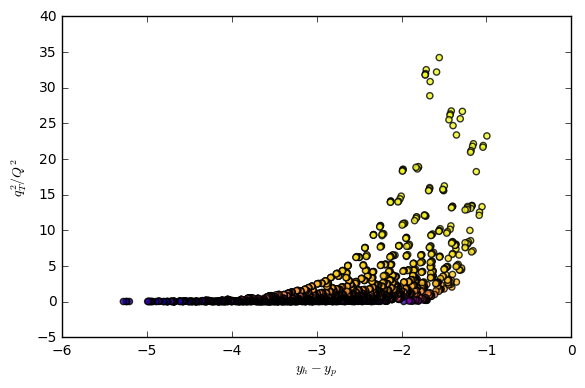

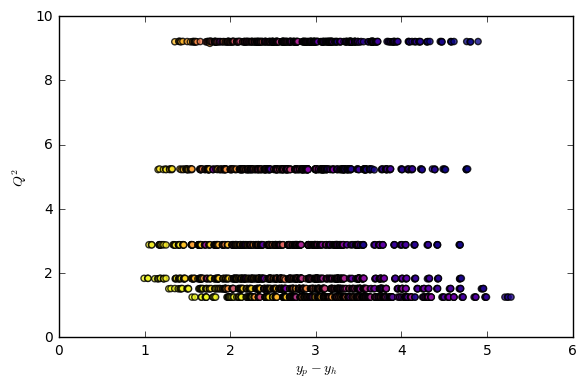

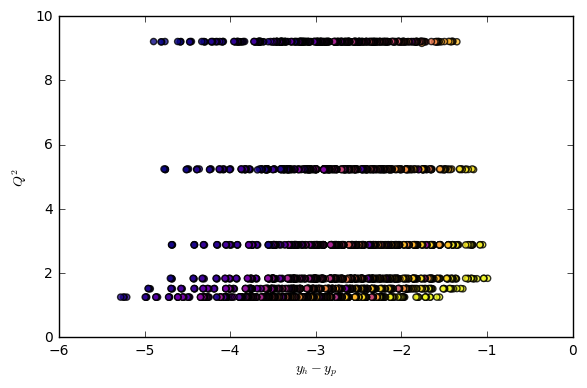

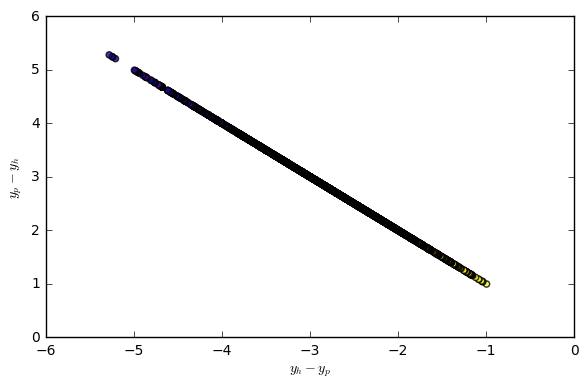

In [11]:
# labels = ("Q2", "pT", "x", "y", "z")
labels = ("qT","qToverQ2","Q2","dy","yh_minus_yp")

for v, h in combinations(labels, 2):
    fig, ax, vert, hor = color_plot(data,v, h, alpha=0.8)

    print(v + " vs. " + h)
    print("Number of points:", len(vert))
    print("Unique vertical values:", len(set(vert)))
    print("Unique horizontal values:", len(set(hor)))
    print()

# Let us study the whole HERMES data set

In [13]:
len(data)

2660

In [14]:
len(data.query("z<0.2"))

323

In [15]:
len(data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"))

978

In [118]:
len(data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"))

807

In [119]:
len(data.query("0.2<z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"))

807

In [120]:
len(data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy > 1.25"))

807

Kinematics of the data set

In [16]:
print(np.min(data["x"]))
print(np.max(data["x"]))

print(np.min(data["z"]))
print(np.max(data["z"]))

print(np.min(data["Q2"]))
print(np.max(data["Q2"]))

print(np.min(data["Q2"]))
print(np.max(data["Q2"]))

print(np.min(data["pT"]))
print(np.max(data["pT"]))

0.03752366
0.410544
0.1311618
0.9481632
1.249131
9.218269
1.249131
9.218269
0.05684586
1.357048


In [17]:
data.keys()

Index([              u'Ebeam',                  u'F2',                  u'Q2',
                         u'R',                  u'R0',                  u'R1',
                        u'R2',                  u'W2',                 u'col',
                        u'dy',              u'hadron',                   u'i',
                       u'lnR',                 u'obs',                  u'pT',
                        u'qT',              u'stat_u',           u'systabs_u',
                   u'systrel',              u'target',               u'value',
                         u'x',                  u'xn',                   u'y',
                        u'yf',                  u'yh',                  u'yi',
                        u'yp',                   u'z',                  u'zn',
                   u'systole',         u'yh_minus_yp', u'yi_minus_yp_over_yp',
       u'yf_minus_yh_over_yh',         u'yi_minus_yp',         u'yf_minus_yh',
                      u'QCUT',             u'qToverQ

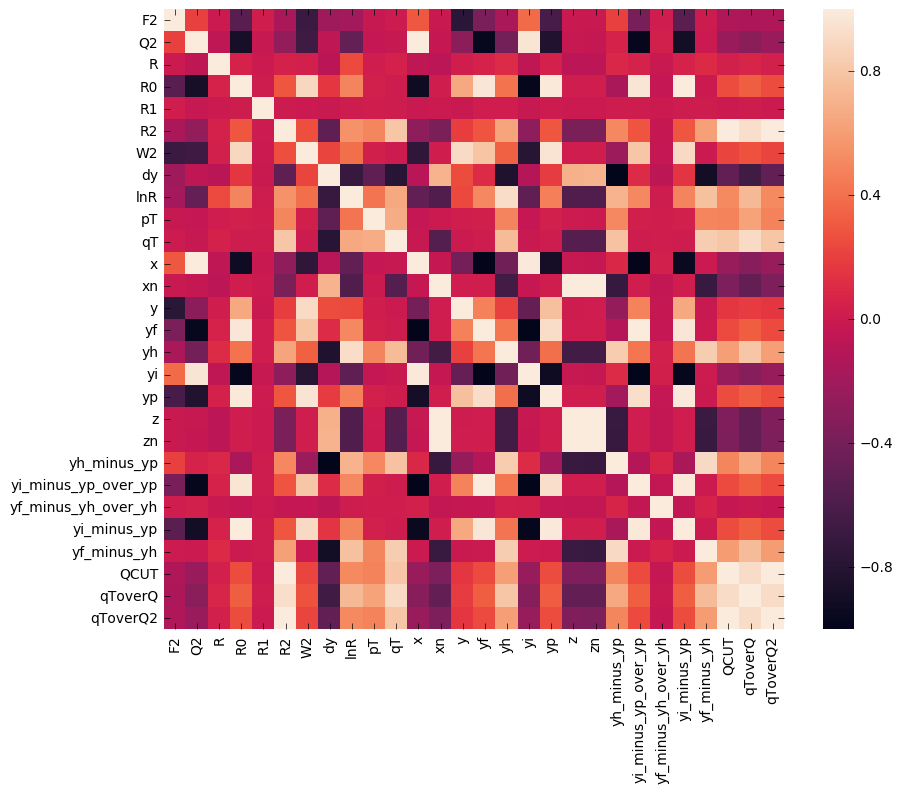

In [18]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
filtered_data = data.drop([
      'Ebeam','obs','value','stat_u','systabs_u','systrel','systole','i','target','hadron','col'
], axis=1)
corr = filtered_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

<IPython.core.display.Javascript object>


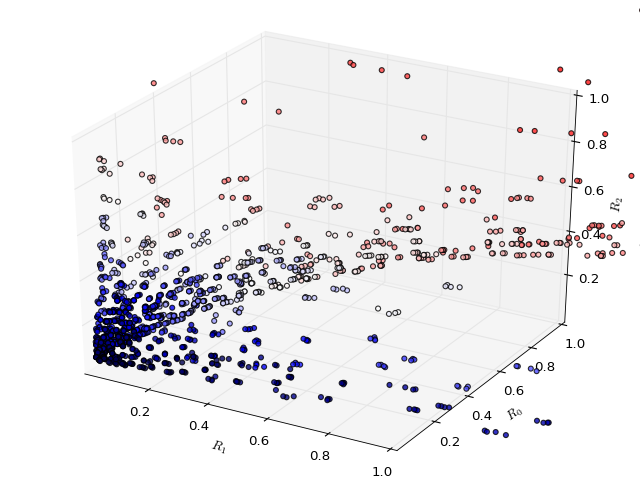

In [17]:
fig, ax, xval, yval, zval = color_plot3D(data,"R1", "R0","R2",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
ax.set_ylim([0.0001,1])
#ax.set_xscale("log")
ax.set_xlim([0.0001,1])
ax.set_zlim([0.0001,1])
##plt.axhline(1,0,1)
#plt.axvline(1,0,1)
#plt.savefig("../Figs/hermes_data_R2_R1.pdf")
plt.show()

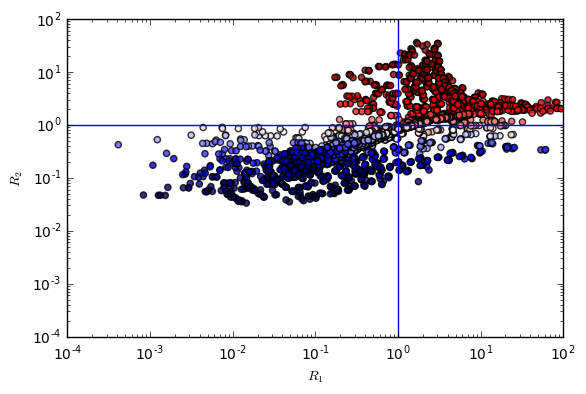

In [30]:
fig, ax, vert, hor = color_plot(data,"R2", "R1",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
ax.set_xscale("log")
ax.set_xlim([0.0001,100])
plt.axhline(1,0,1)
plt.axvline(1,0,1)
plt.savefig("../Figs/hermes_data_R2_R1.pdf")
plt.show()

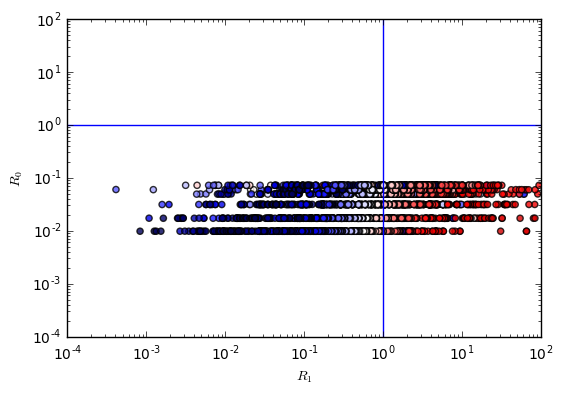

In [32]:
fig, ax, vert, hor = color_plot(data,"R0", "R1",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
ax.set_xscale("log")
ax.set_xlim([0.0001,100])
plt.axhline(1,0,1)
plt.axvline(1,0,1)
plt.savefig("../Figs/hermes_data_R0_R1.pdf")
plt.show()

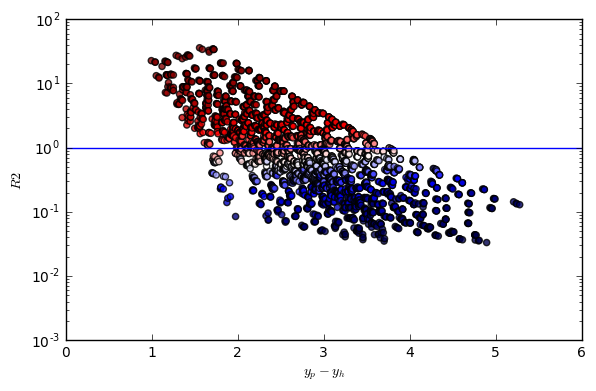

In [19]:
fig, ax, vert, hor = color_plot(data,"R2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,100])
plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_R2.pdf")
plt.show()

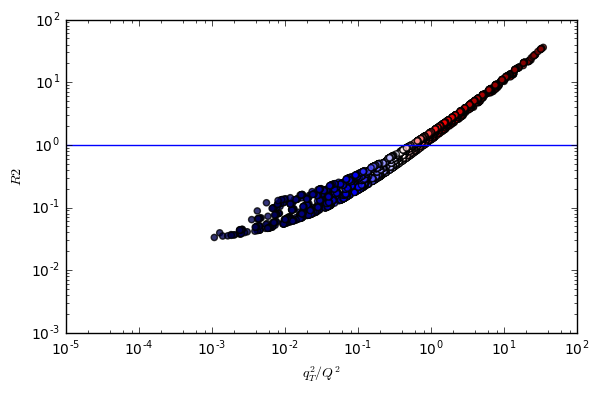

In [20]:
fig, ax, vert, hor = color_plot(data,"R2", "qToverQ2",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim([0.001,100])
ax.set_xlim([0.00001,100])
plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_R2_qToverQ.pdf")
plt.show()

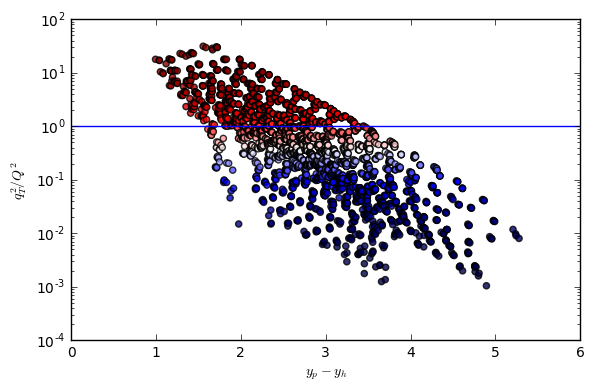

In [126]:

fig, ax, vert, hor = color_plot(data,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_all.pdf")
plt.show()

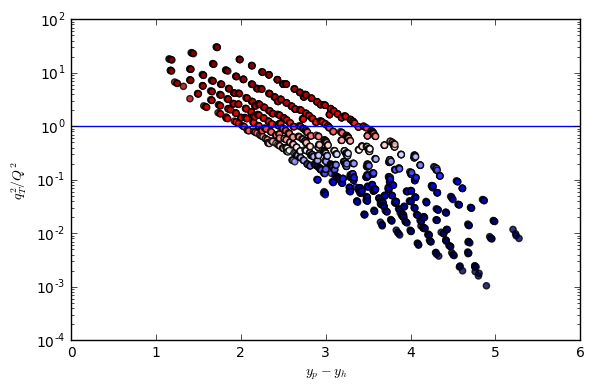

In [127]:
data_pion = data.query("hadron=='pi+' or hadron=='pi-'")
fig, ax, vert, hor = color_plot(data_pion,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_pion.pdf")
plt.show()

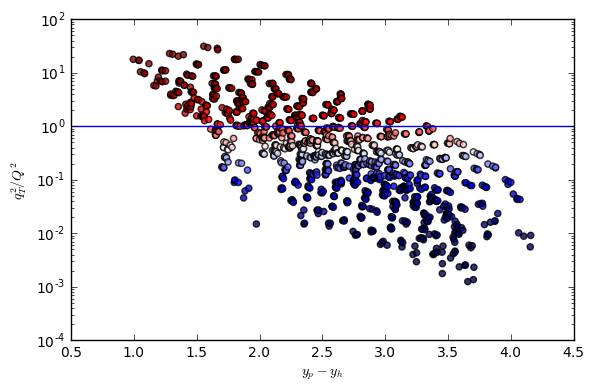

In [128]:
data_kaon = data.query("hadron=='k+' or hadron=='k-'")
fig, ax, vert, hor = color_plot(data_kaon,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_kaon.pdf")
plt.show()

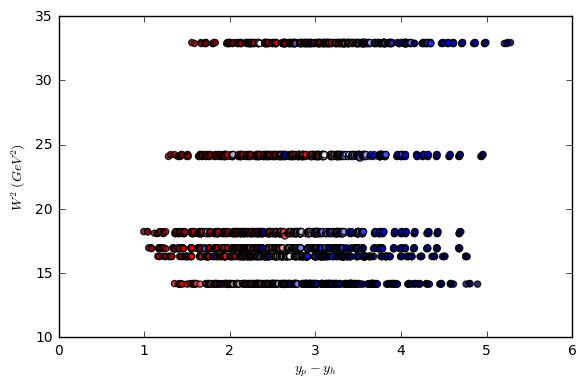

In [129]:
fig, ax, vert, hor = color_plot(data,"W2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_all_W2.pdf")
plt.show()

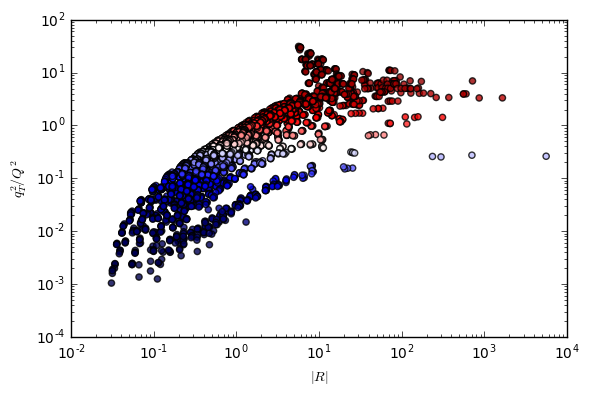

In [130]:
fig, ax, vert, hor = color_plot(data,"qToverQ2", "R",cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_all_qt_vs_R.pdf")
plt.show()

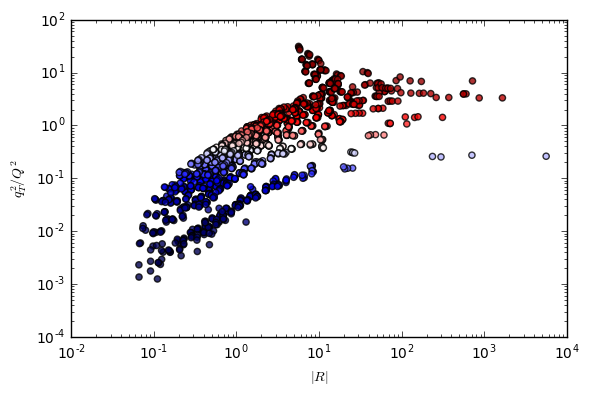

In [131]:
fig, ax, vert, hor = color_plot(data_kaon,"qToverQ2", "R",cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_kaon_qt_vs_R.pdf")
plt.show()

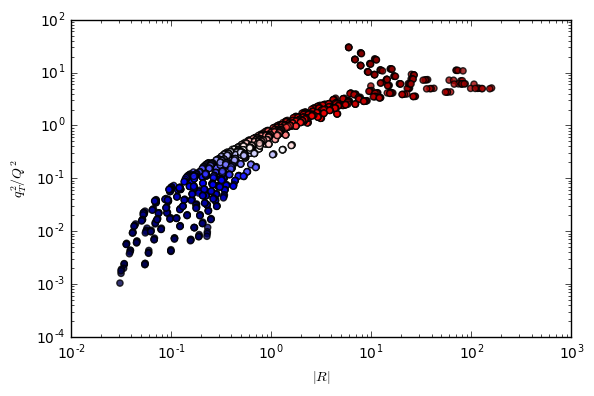

In [132]:
fig, ax, vert, hor = color_plot(data_pion,"qToverQ2", "R",cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_pion_qt_vs_R.pdf")
plt.show()

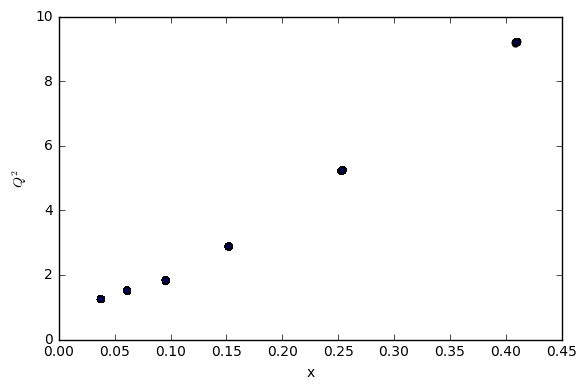

In [133]:
fig, ax, vert, hor = color_plot(data,"Q2", "x",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
#plt.savefig("../Figs/hermes_data_all.pdf")
plt.show()

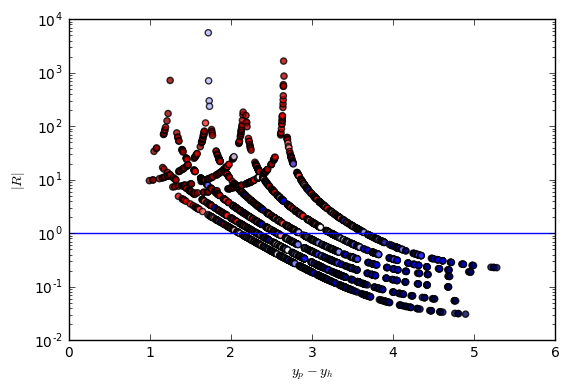

In [134]:
fig, ax, vert, hor = color_plot(data,"R", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,10000])
plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_all_R.pdf")
plt.show()

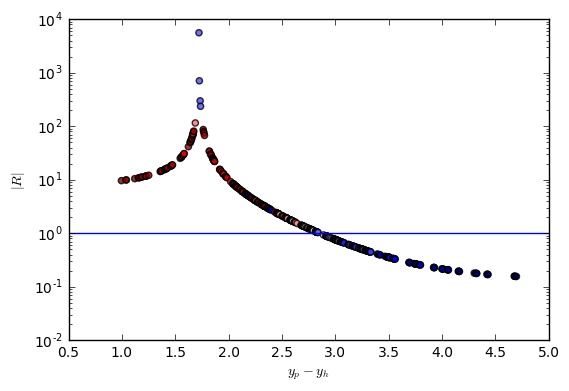

In [135]:
filtered_data = data.query("x<0.12 and x>0.094")
fig, ax, vert, hor = color_plot(filtered_data,"R", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,10000])
plt.axhline(1.,0,6)
#plt.savefig("../Figs/hermes_data_all_R.pdf")
plt.show()

In [136]:
filtered_data["z"]

2452    0.147065
2117    0.157919
789     0.158219
1123    0.166582
454     0.154651
118     0.163444
1447    0.165715
1782    0.170145
1122    0.158458
2451    0.155165
788     0.155659
2116    0.163791
1121    0.149136
2450    0.148644
787     0.150253
2115    0.149754
453     0.151025
117     0.152725
1781    0.151312
1446    0.157086
796     0.239232
2459    0.223189
1120    0.143012
2124    0.241625
786     0.143923
2449    0.143180
1130    0.247975
2114    0.144541
1454    0.232923
1789    0.234926
          ...   
1477    0.531219
1812    0.530479
140     0.419518
476     0.420395
1804    0.419745
1469    0.420000
499     0.880130
1827    0.884785
163     0.888629
1492    0.885831
491     0.694303
155     0.694509
1819    0.692933
1484    0.693687
147     0.533230
1476    0.531059
483     0.533751
1811    0.531144
498     0.889081
1491    0.892715
162     0.897135
1826    0.894733
490     0.693930
154     0.696049
1818    0.696641
1483    0.696686
497     0.888684
161     0.9016

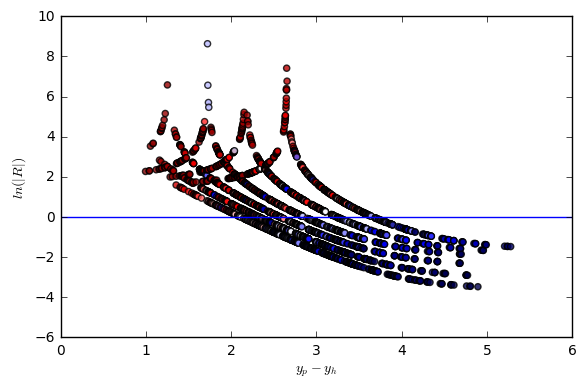

In [137]:
fig, ax, vert, hor = color_plot(data,"lnR", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
plt.axhline(0,0,6)
plt.savefig("../Figs/hermes_data_all_lnR.pdf")
plt.show()

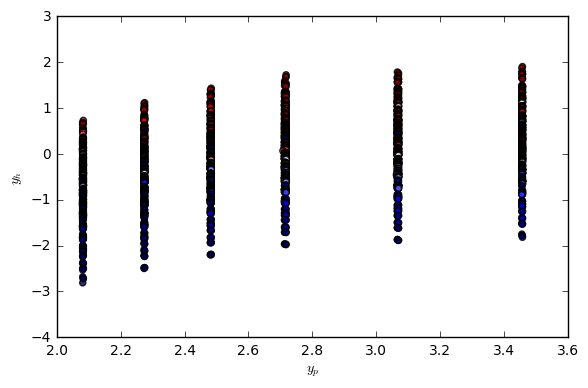

In [138]:
fig, ax, vert, hor = color_plot(data,"yh", "yp",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.show()

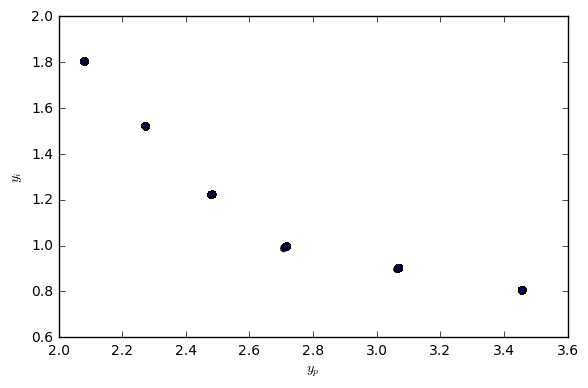

In [139]:
fig, ax, vert, hor = color_plot(data,"yi", "yp",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.show()

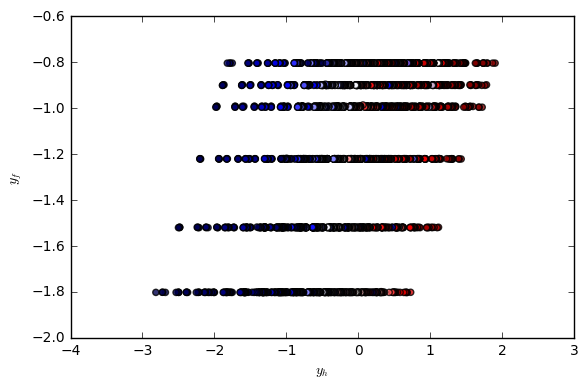

In [140]:
fig, ax, vert, hor = color_plot(data,"yf", "yh",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.show()

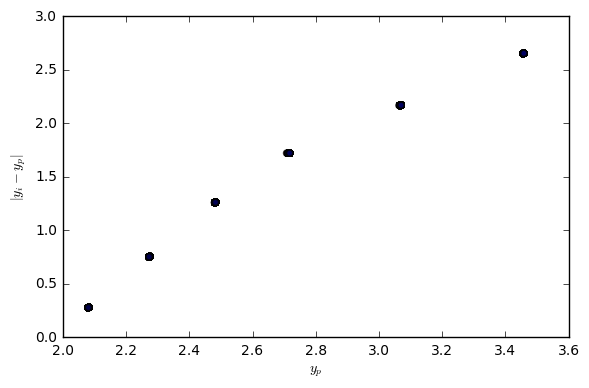

In [141]:
fig, ax, vert, hor = color_plot(data,"yi_minus_yp", "yp",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.savefig("../Figs/hermes_data_yi_minus_yp.pdf")
plt.show()

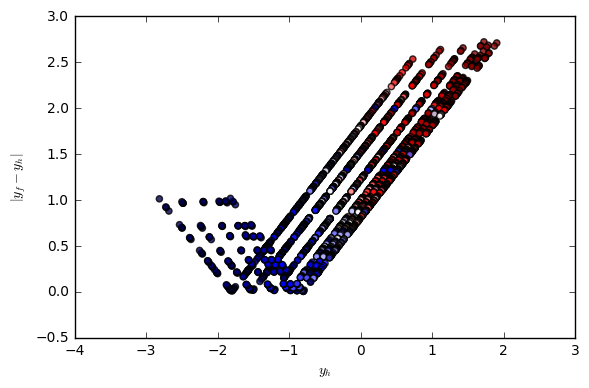

In [142]:
fig, ax, vert, hor = color_plot(data,"yf_minus_yh", "yh",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.savefig("../Figs/hermes_data_yf_minus_yh.pdf")
plt.show()

# Here we create filtered data with standard Torino cuts

In [143]:
torino_data = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9")

In [144]:
normal_length = len(torino_data)

len(torino_data.query("(pT/z)**2>=Q2"))

292

In [145]:
len(torino_data)

978

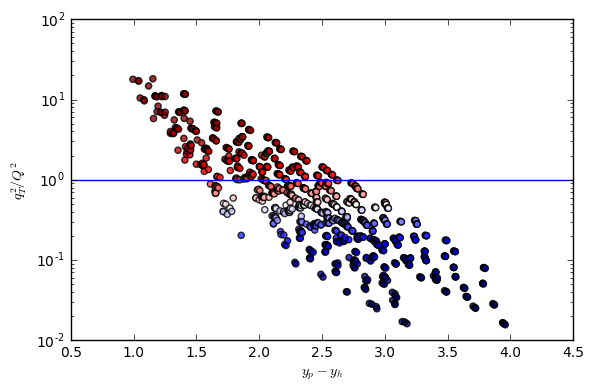

In [146]:
fig, ax, vert, hor = color_plot(torino_data,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,100])
plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_torino.pdf")
plt.show()


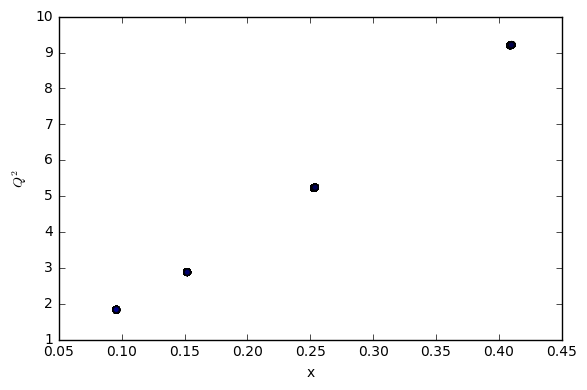

In [147]:
fig, ax, vert, hor = color_plot(torino_data,"Q2", "x",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.01,100])
#plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_Q2_x.pdf")
plt.show()

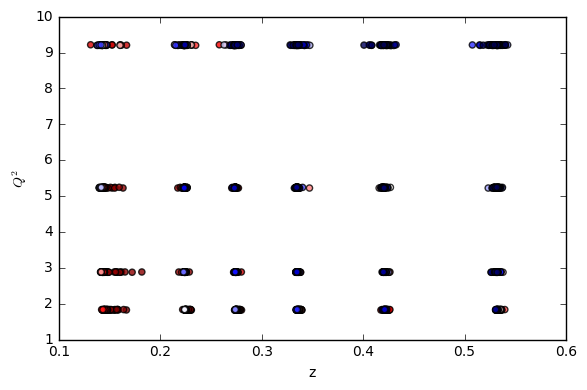

In [148]:
fig, ax, vert, hor = color_plot(torino_data,"Q2", "z",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.01,100])
#plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_Q2_z.pdf")
plt.show()

Let us see what happens if we add rapidity cut to Torino selection

In [149]:
torino_data_rap = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy>2.5")
len(torino_data_rap)

473

In [150]:
len(torino_data_rap.query("(pT/z)**2>=Q2"))

11

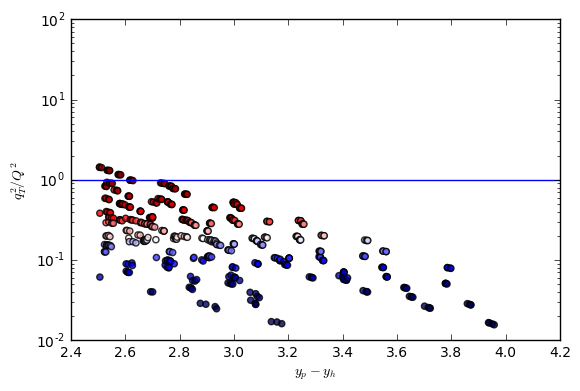

In [151]:
fig, ax, vert, hor = color_plot(torino_data_rap,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,100])
plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_torino_rapidity.pdf")
plt.show()

# Here we create filtered data with TMD inspired cuts

363


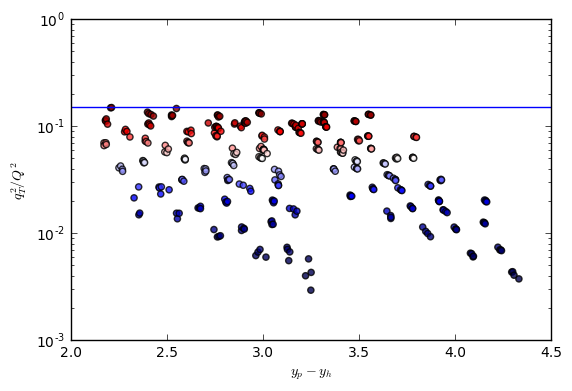

In [152]:
cut_data_qt = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2")
#cut_data_qt = data.query("z>0.2 and z<0.6 and Q2>1.69 and dy>2.5")
print(len(cut_data_qt))
fig, ax, vert, hor = color_plot(cut_data_qt,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,1])
plt.axhline(0.15,0,6)
plt.savefig("../Figs/hermes_data_rapidity.pdf")
plt.show()


# Here we explore R cut

In [153]:
print(np.min(data["lnR"]))
print(np.max(data["lnR"]))

-3.48223561069
8.62974462199


463


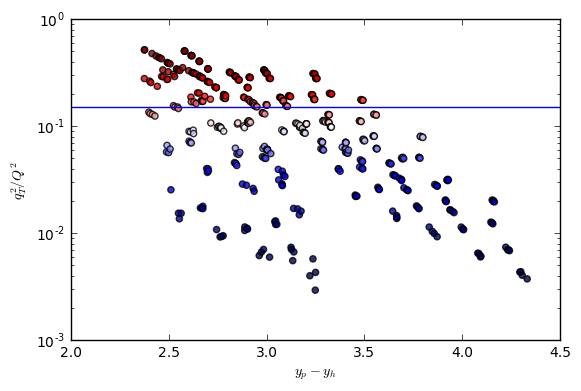

In [154]:
#cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2 and lnR<-1.5")
cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and lnR<-0.5")

print(len(cut_data_R))
fig, ax, vert, hor = color_plot(cut_data_R,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,1])
plt.axhline(0.15,0,6)
plt.savefig("../Figs/hermes_data_R.pdf")
plt.show()

36


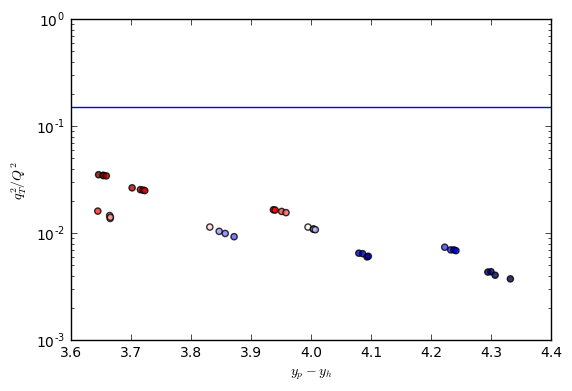

In [155]:
cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and lnR<-2.5")

print(len(cut_data_R))
fig, ax, vert, hor = color_plot(cut_data_R,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,1])
plt.axhline(0.15,0,6)
plt.savefig("../Figs/hermes_data_R25.pdf")
plt.show()

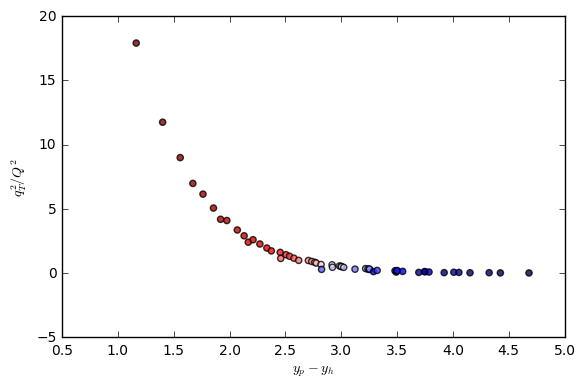

In [156]:
#torino_data_x = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and x<0.1 and target=='proton' and hadron=='pi+'")
torino_data_x = data.query("x<0.096 and x>0.094 and target=='proton' and hadron=='pi+'")

fig, ax, vert, hor = color_plot(torino_data_x,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.01,100])
#plt.axhline(0.15,0,6)
plt.show()